K-means Algorithm

Total within-cluster sum of squares:  69.90485166823235


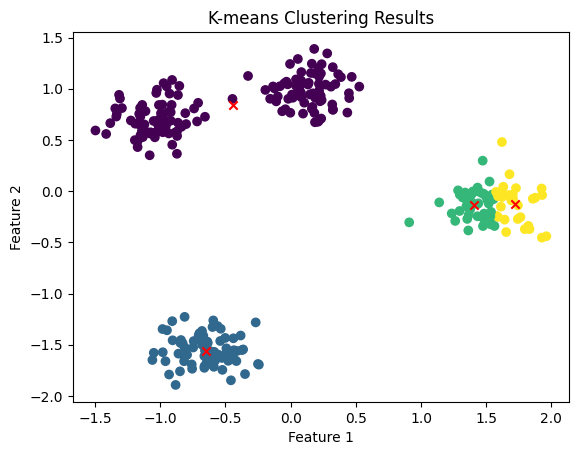

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate a synthetic dataset with 300 samples and 2 features
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])

def initialize_centroids(data, k):
    #Randomly initialize the centroids from the data points.
    # Your implementation here
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    return centroids


def compute_distances(data, centroids):
    #Compute the distances between each data point and centroids.
    # Your implementation here
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return distances

def assign_clusters(distances):
    #Assign each data point to the closest centroid.
    # Your implementation here
    clusters = np.argmin(distances, axis=1)
    return clusters

def update_centroids(data, clusters, k):
    #Update the centroids by computing the mean of the points in each cluster.
    # Your implementation here
    centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
    return centroids

def k_means(data, k, max_iterations=100):
    #Implement the K-means clustering algorithm.
    # Your implementation here
    # Initialize the centroids
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        # Compute the distances between data points and centroids
        distances = compute_distances(data, centroids)
        # Assign data points to the closest centroid
        clusters = assign_clusters(distances)
        # Update the centroids
        new_centroids = update_centroids(data, clusters, k)
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters


# Choose the number of clusters, K
k = 4
# Run the K-means algorithm
centroids, clusters = k_means(data_scaled, k)
# Compute the total within-cluster sum of squares
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] - centroids[i])) for i in range(k)])
print("Total within-cluster sum of squares: ", wcss)

# Plot the dataset with the assigned clusters and centroids
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.show()


K-mediods Algorithm

Total within-cluster sum of squares:  83.75798355710916


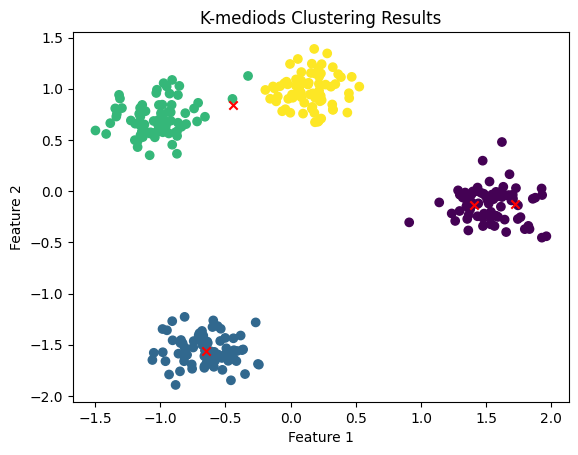

In [2]:

def initialize_medoids(data, k):
    #Randomly initialize the medoids from the data points.
    # Your implementation here
    medoids = data[np.random.choice(data.shape[0], k, replace=False)]
    return medoids

def compute_dissimilarities(data, medoids):
    #Compute the dissimilarities between each data point and medoids.
    # Your implementation here
    dissimilarities = np.linalg.norm(data[:, np.newaxis] - medoids, axis=2)
    return dissimilarities

def assign_clusters(dissimilarities):
    #Assign each data point to the closest medoid.
    # Your implementation here
    clusters = np.argmin(dissimilarities, axis=1)
    return clusters

def update_medoids(data, clusters, k):
    #Update the medoids by selecting the data point with the minimum sum of dissimilarities in each cluster.
    # Your implementation here
    dissimilarities = compute_dissimilarities(data, data)
    medoids = np.array([data[clusters == i][np.argmin(np.sum(dissimilarities[clusters == i], axis=1))] for i in range(k)])
    return medoids

def k_medoids(data, k, max_iterations=100):
    #Implement the K-medoids clustering algorithm.
    # Your implementation here
    # Initialize the medoids
    medoids = initialize_medoids(data, k)
    for _ in range(max_iterations):
        # Compute the dissimilarities between data points and medoids
        dissimilarities = compute_dissimilarities(data, medoids)
        # Assign data points to the closest medoid
        clusters = assign_clusters(dissimilarities)
        # Update the medoids
        new_medoids = update_medoids(data, clusters, k)
        # Check for convergence
        if np.all(medoids == new_medoids):
            break
        medoids = new_medoids
    return medoids, clusters

# Choose the number of clusters, K
k = 4
# Run the K-mediods algorithm
medoids, clusters = k_medoids(data_scaled, k)
# Compute the total within-cluster sum of squares
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] - medoids[i])) for i in range(k)])
print("Total within-cluster sum of squares: ", wcss)

# Plot the dataset with the assigned clusters and centroids
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-mediods Clustering Results')
plt.show()